<a href="https://colab.research.google.com/github/mattkingros/Classwork/blob/main/RMT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Policy Based SGD: the problem of corrupted data.

## Problem statement:

We begin with an overview of the problem. This is taken from a combination of the works [Large,Dyn].

 We suppose we have a large dataset, but know the only a small fraction of this data is relevant to the actual problem we are interested in. This can arise naturally in several contexts. First - there is the case a large portion of your data is unreliable, or corrupted entirely due to measurement or machine error. In the modern computer vision arena, there is also the situation where algorithms are trained to recognize very specific details in images, and use all other data as "negative examples", for example recognizing street signs in a city-scape dataset. This gives rise to a natural question: is there a way to include this corruption assumption within optimization schemes to boost performance?

A simple way to model this problem is to sample rows of data $a_{j} \in \mathbb{R}^{d}$ with labels $\hat{b} \in \mathbb{R}^{n}$ from an underlying distripution $p$, and add  large noise $\eta_{j}$ to a large fraction of the data $\hat{b}_{j}$, and thus *corrupting* the data. Abusing notation to include the noise within $b = \hat{b} + \sqrt{n}\eta$, this gives the minimization problem

$$ \min_{x \in \mathbb{R}^{D} } \left[ f(x) = \frac{1}{2} \sum_{i=1}^{n} (a_{i}x -\hat{b}_{i} + \sqrt{n} \eta_{i} )^{2} \right] = \Vert Ax - b \Vert^{2} $$

Of course, any algorithm that samples uniformly the $a_{j}$ will struggle due to the corruptions in $b_{j}$. Thus, we introduce a probability vector $p_{t}$ - which we will update at each time $t$ - measuring the *quality* of a datapoint. So, instead of a usual stochastic gradient descent algorithm, where each index $i_{k}$ is sampled uniformly at random, we sample according to the current running probability, namely $i_{k} \sim p_{k}$. This gives the simple generalization of SGD as follows:

> Initialize $x_{0} \sim \mathcal{N}(0,1)$ and $p_{0} = (1/n)_{i=1}^{n}$ \\
For iteration $k=0,1, \ldots$ \\
Draw index $i_{k} \sim p_{k}$, then set \\
$x_{k+1} = x_{k} - \gamma a_{i_{k}} ( a_{i_{k}} \cdot x_{k} - b_{i_{k}} )$ \\
$p_{k+1} = P(a_{i_{k}}, x_{k}, b_{i_{k}},p_{k})$

Where $P$ is some update policy. This formulation leads to several interesting (and open ended!) questions: 
* How does a general policy appear in the test loss $\mathbb{E}(Ax_{k} - b)$?
* Under what conditions can you find a policy $P$ that is better than vanilla SGD?
* How does this policy depend - if at all - on the structure of the noise?

In this project, we will focus primarily on exploring the last two questions via numerical simulation. The first question we leave for further work.

Finally, we end our intoduction with some remarks on what this project does not examine, or explicity disallows. We *do not* consider any methods that have *a priori* denoised the data matrix $A$, as this leads to a fundamentally different question. We do however allow mild assumptions on the distribution underlying this matrix.


# A limited mathematical perspectives on the constant policy case.

While the goal of this project is to explore ideas and the performance of non-constant policy case, there is wonderful theory for the constant policy case. We will share some of this theory here, with the goal of understanding what new ideas may be needed in the general case. Our goal will be to understand the dynamics of stochatic graident descent iteration in the constant policy case.


We specialize immediately to our simple case:

We assume$A$ is gaussian, and we assume that the initialization $x_{0}$ is sufficiently close in the sense $\Vert x_{0} - x \Vert = R$, and the entries of noise $\eta$ is iid random variables with bounded moments, and second moment $\hat{R}. For more detail on these conditions, see [Large], but any subexponential law of noise (say uniform or Gaussian) will satisfy these and any other necessary technical assumption.

Already these assumption will need modification for the non-consant policy case, as we have assumed our noise is only iid on some subset of indices. Furthermore, the result proved in the original work is shown for a larger class of matrices, namely orthogonally invariant $A$.

## Theorem [Large, Thm.1]
Suppose the stepsize $\gamma < \frac{2n}{d} \int_{0}^{\infty} x d \mu(x))^{-1}$ as $d,n \to \infty$. Under the assumptions above
$$  \sup_{t \in [0,T]} \vert f(x_{nt}) - \psi_{0}(t) \vert   \to 0$$
in probability as $n \to \inf$. 

Here, $\psi_{0}$ is the solution to the volterra equation

$$\psi_{0} = \frac{R}{2} h_{1}(t) + \frac{\hat{R}}{2} \left( \frac{d}{n} h_{0}(t) +(1-r) \right) +  \int_{0}^{t} \gamma^{2}r h_{2}(t-s\psi_{0}(s)ds $$
with 
$$ h_{k} = \int_{0}^{\infty} x^{k}e^{-2 \gamma t x } d\mu(x).$$


## An overview of the reduction

We do note prove this result here, and instead overview and highlight some steps of the reduction from Stochastic Gradient Descent into the volterra equation. \\

Note that we can write the update step in the form
$$ x_{k+1} = x_{k} = \gamma A^{T} P(x_{k}) (Ax_{k} - b). $$
Where $P(x_{k}) = e_{i_{k}}e_{i_{k}}^{T}$, and $i_{k}$ is an index draw according to $p_{k} = P(a_{i_{k}}, x_{k}, b_{i_{k}},p_{k})$ the policy at step $k$. For SGD this is just the uniform policy. Performing a singular value decomposition of $\frac{1}{\sqrt{n}} A = U \Sigma V^{T}$ and defining $\hat{v}-{k} = V^{T}(x_{k}-x)$, we can rewrite the above as 
$$ \hat{v}_{k+1} = \hat{v}_{k} - \gamma \Sigma^{T} U^{T} P_{k}(U \Sigma \hat{v}_{k} - \eta).$$

We can further embed $\hat{v}_{k}$ into continuous time via an appropriate poisson process, to give a process $v_{k}$ such that in a single unit of time, in expectation, the algorithm has done one epoch. We have seen this in lecture, and one can find additional details in the original work. This gives us an expasion of the original objective function as
$$ f(x_{N_{t}}) = \frac{1}{2}\Vert \Sigma v_{t} - U^{T} \eta \Vert^{2} = \frac{1}{2} \sum_{j=1}^{d}\sigma_{j}^{2} v_{t,j}^{2} -   \sum_{j=1}^{d \wedge n} \sum_{j=1}^{d}\sigma_{j} v_{t,j} (U^{T} \eta)_{j} + \Vert \eta \Vert^{2}.$$

Hence, the dynamics are governed by by the behaivor of the $v_{t,j}$ and $v_{t,j}$ processes'. Understanding this is the so-called *key lemma* of the original work, and is nontrivial to show. This is likely where much effort will be spent in generalizing this to the policy case. The summary however is that
$$ v_{t_{j}} = v_{0,j} e^{- \gamma \sigma_{j}^{2}} + \int_{0}^{t} \gamma \sigma_{j}(U^{T} \eta)_{j} e^{ {- \gamma \sigma_{j}^{2}}(t-s) }  ds + d M_{s,j}$$

and a similar expression holds for the squared process, and thus we can see the volterra behaivor. Showing this in complete detail is beyond the scope of this project, but is an interesting and deep analysis.

## First Experiments: Some Baselines

We first begin by simply implementing the policy based SGD as described above:

In [56]:
from math import pi
import numpy as np
import numpy.random as rnd
from random import choices
import matplotlib.pyplot as plt
from scipy.stats import norm

def gaussian(x, mu, sig):
    return 1/(sig*np.sqrt(2*pi)) * np.exp((-1/2)* ((x-mu)/sig)**2);

def laplace(x,mu,b):
    return  (1/(2*b))*np.exp(-np.abs(x-mu)/b);


def policy_SGD(A,b,xk,p0,x,Pol,gamma,maxit):
  # Policy based SGD.
  # Inputs: 
  #   - A,b measurement matrix and target vector b
  #   - xk,pk initializations
  #   - Pol policy, gamma stempsize, maxit maximimum iterations
  # Note the x inclusion is only for nice plots later (saving true residual),
  # and is not actually used in the algorithm!

  i=0;

  res = [];
  pk = p0;

  while((i<maxit) or (np.linalg.norm(xk-x)/np.linalg.norm(xk)< tol)):
    # End iterations after some fixed k
    # Or we converge (can't test this in general, would use some cauchy criterion instead.)
    
    # Pick random index according to pk
    prob = np.transpose(pk)[0]
    ik = rnd.choice(n,size=None,p=prob)

    # Take appropriate row / entries
    aik = np.reshape(A[ik,:],[d,1])
    bik = b[ik]

    # update xk, policy
    xk = xk - aik * gamma * (np.dot(np.transpose(aik),xk) -bik)
    pk = Pol(aik,xk,bik,pk,ik)

    # save relative error for plotting later.
    res.append(np.linalg.norm(xk-x)/np.linalg.norm(x))

    i+=1;

  return xk,res,pk;



Before attempting to design or analyse any interesting policy, it is important to mention the behaivor of the two most extreme possible policies: the constant policy, and the oracle policy. These can be interpreted as using "no information" about the data, and "all possible information". To clarify, by the "oracle policy" we are referring to the policy which solves the Stochastic gradient descent using only the uncorrupted data - which will never be reasonably possible in practice.

One important question before examing either policy - that we will return to later - is the actual mechanism of corruption! We will set $b_{i} = b_{i} + \sqrt{n} \eta_{i}$ for $i=1, \ldots, c < n$, corrupting the first $c$ rows of $A,b$ without loss of generalizty. There is a further interesting question of which types of $\eta$ are interesting, arise in practice, or are amicable to analysis - which we will put this aside and examine policies first.

Our first experiments - and the least interesting - are testing vanilla SGD on uncorrupted, and the "cheating" oracle SGD on corrupted data. For both, we fix $d=100, n=50$, and in the second we choose $c = 25$ so half the data is corrupted. Further, our stepsize is contant $1/2n$. These serve as only baseline parameter choices and one can easily tune these - but this is not the point of this work!

In [57]:
# Fixed Parameters
d = 100;
n = 50;
maxit = 1000;
c = int(np.ceil(n*0.5))
gamma = 0.5/n;
tol = 10^-8;

#initialization steps
x0 = rnd.randn(d,1);
x0 = x0/np.linalg.norm(x0);
p0 = (1/n)*np.ones([n,1])

# Data generation and additive noise
A = rnd.randn(n,d)
x = rnd.rand(d,1)


# implementing the two policies

def constant_pol(aik,xk,bik,p,ik):
    # This policy doesnt do anything!
    return p;

def oracle_Pol(aik,xk,bik,p,ik):
    # This policy CHEATS! it has knowledge of the corruption ahead of time!
    c = int(np.ceil(n*0.5));
            
    p = np.zeros([len(p),1])
    p[c:len(p)] = 1/(n-c);
    return p

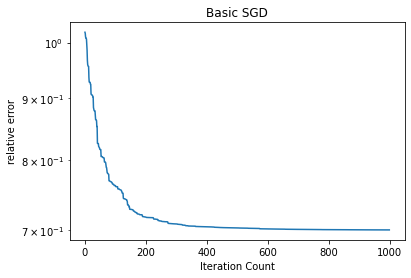

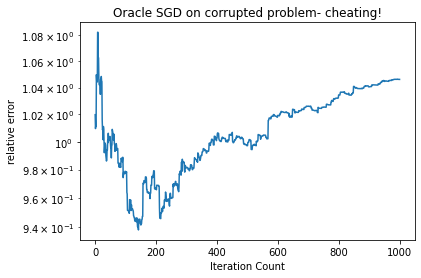

In [64]:
# Some Sanity Checks!
# These experiments are only done for 1 draw of A,x 
# as we looking for qualitative trends, not analysing anything.


# in the noiseless case, do we get expected convergence of SGD?:
# Noise model for now simply added gaussian
b = np.matmul(A,x)

_,res,_ = policy_SGD(A,b,x0,p0,x,constant_pol,gamma,maxit);
plt.figure();
plt.semilogy(res);
plt.ylabel("relative error")
plt.xlabel("Iteration Count")
plt.title("Basic SGD")
# if we corrupt the first c entries and use an oracle, do we get the right rate?

# normalizing stepsize, noise ratio etc, to make sure problem is "correctly scaled"
# As the oralce is "cheating" already, all of this is equivalently bad!
# But: still a good sanity check that we get the expected SGD rate.

# gamma = 0.5/(n-c);
b[0:c] = b[0:c] + np.sqrt(n)*rnd.randn(c,1)
_,res,_= policy_SGD(A,b,x0,p0,x,constant_pol,gamma,maxit);
plt.figure();
plt.semilogy(res);
plt.ylabel("relative error")
plt.xlabel("Iteration Count")
plt.title("Oracle SGD on corrupted problem- cheating!");


As expected these perform well with the usual convergence rate. We observe the classic dip in SGD where we reach some minimium norm of the residual, then climb out after too many iterations. Note these tests are *not* average runs, and just 1 test as they are intended to check the functionality of the code and not illuminate any interesting behaivor.

Next, we test vanilla SGD on the corrupted problem, with the same parameter choices as above - this time, plotting the average result and standard deviation over 25 simulations. This exhibits the expected - but not spectacular - convergence, only reaching $O(1)$ accuracy.

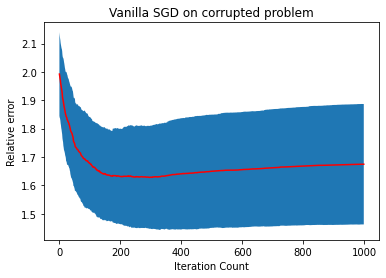

In [65]:
# using Vanilla SGD on the corrupted problem:

num_tests = 25

avg_res = np.zeros([num_tests,maxit]);

for test in np.arange(num_tests):   
  #initialization steps
  x0 = rnd.randn(d,1)
  p0 = (1/n)*np.ones([n,1])

  # Data generation and additive noise
  A = rnd.randn(n,d)
  x = rnd.rand(d,1)

  # corrupting the data
  b = np.matmul(A,x) 
  b[0:c] = b[0:c] + np.sqrt(n)*rnd.randn(c,1)

  _,res,_= policy_SGD(A,b,x0,p0,x,constant_pol,gamma,maxit);
  avg_res[test,:] = res;

mean = np.mean(avg_res,0)
std = np.std(avg_res,0)

plt.figure();
plt.plot(mean,'r');
plt.fill_between(np.arange(maxit),mean+std, mean-std);
plt.ylabel("Relative error")
plt.xlabel("Iteration Count")
plt.title("Vanilla SGD on corrupted problem");


Now we begin to actually design our own policies!

Starting from first principles, our goal is find policy minimizing a test loss $\mathbb{E}\Vert Ax -b \Vert $, as a proxy for the true norm. So a greedy approach is to take $p$ minimizing the 1-step test loss
$$ p_{k+1} = \arg \min_{\rho} \vert a_{i_{k}} \rho(x) - b_{i_{k}} \vert $$

This approach may very well be easily tractible, but an approach from my background that seems amenable to this problem is that of likelihood. Thus, we transform our problem to instead maximizing
$$ p_{k+1} = \arg \max_{\rho} \mathbb{P} (b_{i_{k}} \vert a_{i_{k}},\rho )$$

This is built on the assumption that "The amount of information gained is proportional to the likelihood of an event occuring". Given that our data is distributed normally, thiis means we are conditioning $b$ with a guassian, with is computable with many weak priors.

Using these two ideas I propose two initial policies:
* The first computes the likelihood of $b_{i_{k}}$ given $a_{ik}x$ gaussian, and adds this to $p_{i_{k}}$.
* The second computes the likelihood of $\vert a_{i_{k}}x - b \vert$ given the noise is gaussian, and adds this to $p_{i_{k}}$ 

Note the second policy uses some assumption on the distibution of the noise (not which data is corrupted) and we can - and will - change this later.

Using the same parameters as above, we examine the dynamics of these algorithms, and also plot the final probability vector $p$





In [66]:
def likelihood_pol(aik,xk,bik,p,ik):
  
  p[np.arange(len(p))!=ik] = p[np.arange(len(p))!=ik] - (1/(n-1))*(gaussian(bik,0,np.sqrt(n)) - p[ik])
  p[ik] = p[ik]+ (gaussian(bik,0,np.sqrt(n)))
  

  #Just in case we have a zero element:
  for j in [p<0]:
    p[j]=0;

  # This does nothing unless we had a zero element.
  if(sum(p)!= 1.0):
    p /= sum(p)

  return p

def likelihood_pol_cdf(aik,xk,bik,p,ik):

  residual = abs((np.dot(np.transpose(aik),xk) -bik));
  
  p[ik] = p[ik] + norm.cdf(residual)
  p[np.arange(len(p))!=ik] = p[np.arange(len(p))!=ik] - (1/(n-1))*(norm.cdf(residual))
  

  #Just in case we have a zero element:
  for j in [p<0]:
    p[j]=0;

  # This does nothing unless we had a zero element.
  if(sum(p)!= 1.0):
    p /= sum(p)

  return p



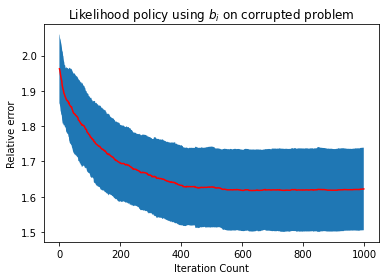

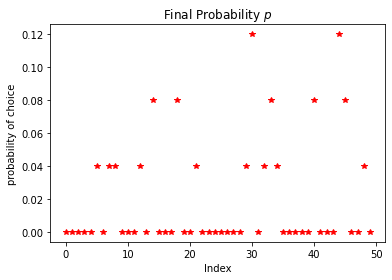

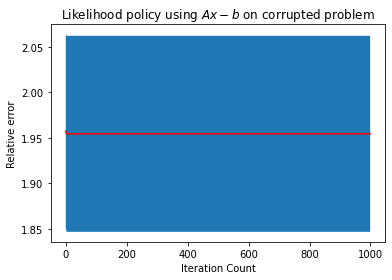

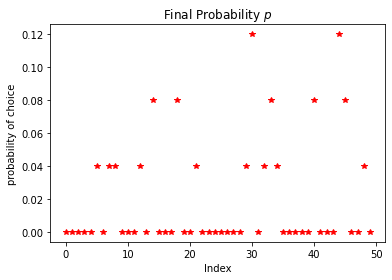

In [67]:

avg_p_lh = np.zeros([num_tests,n])
avg_res_lh = np.zeros([num_tests,maxit]);

avg_p_cdf = np.zeros([num_tests,n])
avg_res_cdf = np.zeros([num_tests,maxit]);

for test in np.arange(num_tests):   
  #initialization steps
  x0 = rnd.randn(d,1)
  p0 = (1/n)*np.ones([n,1]);

  # Data generation and additive noise
  A = rnd.randn(n,d)
  x = rnd.rand(d,1)

  # corrupting the data
  b = np.matmul(A,x) 
  b[0:c] = b[0:c] + np.sqrt(n)*rnd.randn(c,1)

  # SGD and saving results
  _,res_lh,p_lh = policy_SGD(A,b,x0,p0,x,likelihood_pol,gamma,maxit);
  _,res_cdf,p_cdf = policy_SGD(A,b,x0,p0,x,likelihood_pol_cdf,gamma,maxit);

  avg_p_lh[test,0:n] = np.reshape(p_lh,[1,n]);
  avg_res_lh[test,:] = res_lh;

  
  avg_p_cdf[test,0:n] = np.reshape(p_cdf,[1,n]);
  avg_res_cdf[test,:] = res_cdf;

# First experiment
mean_lh = np.mean(avg_res_lh,0)
std = np.std(avg_res_lh,0)

plt.figure();
plt.plot(mean_lh,'r');
plt.fill_between(np.arange(maxit),mean_lh+std, mean_lh-std);
plt.ylabel("Relative error");
plt.xlabel("Iteration Count");
plt.title("Likelihood policy using $b_{i}$ on corrupted problem");

plt.figure();
plt.plot(np.mean(avg_p_lh,0),'r*');
plt.title("Final Probability $p$ - $b_{i}$ method")
plt.ylabel("probability of choice");
plt.xlabel("Index");


# second experiment
mean_cdf = np.mean(avg_res_cdf,0)
std = np.std(avg_res_cdf,0)

plt.figure();
plt.plot(mean_cdf,'r');
plt.fill_between(np.arange(maxit),mean_cdf+std, mean_cdf-std);
plt.ylabel("Relative error");
plt.xlabel("Iteration Count");
plt.title("Likelihood policy using $Ax-b$ on corrupted problem");

plt.figure();
plt.plot(np.mean(avg_p_cdf,0),'r*');
plt.title("Final Probability $p$ - residual method")
plt.ylabel("probability of choice");
plt.xlabel("Index");

These result are interesting in that one method seriously outperforms the other, while they were both justified from similar intuition. Of course, the method that performs the best is the one seeking to maximize the likelihood of observing $b$, a better proxy for the test loss.

From the above, we have seemingly danced around a fundamental idea of this approach: we are asking: "How likely is this data signal, or noise?" - this suggests very strongly using an update or Marchenko-Pastur type - the distribution of eigenvalues of our noise.

This is not as well founded as the two approaches above, but we can easily do a computation of the same type, conditioning the likelihood of $b$ using this distribution to see what occurs.

Finally, we make the obvious observation: throughout this discussion, the data and noise have had very similar distributions. How do these above approaches change if the noise distribution changes? Let us try the same experiment as above, but with noise drawn from a laplace $(0,1)$ sdistribution for the corrupted components. This gives us a new policy in the style of the (failed!) policy above that included this a priori noise knowledge


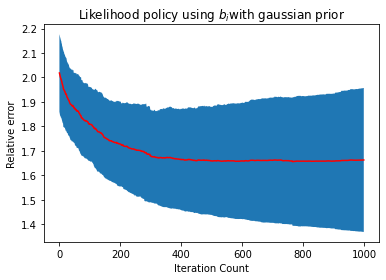

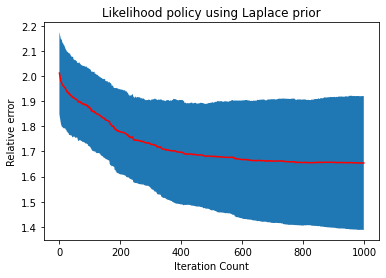

In [70]:
def likelihood_pol_LP(aik,xk,bik,p,ik):

  residual = (np.dot(np.transpose(aik),xk) -bik);
  p[np.arange(len(p))!=ik] = p[np.arange(len(p))!=ik] - (1/(n-1))*(laplace(residual,0,np.sqrt(n))-p[ik])
  p[ik] = p[ik]+ (laplace(residual,0,np.sqrt(n)))
  

  #Just in case we have a zero element:
  for j in [p<0]:
    p[j]=0;

  # This does nothing unless we had a zero element.
  if(sum(p)!= 1.0):
    p /= sum(p)

  return p


avg_p = np.zeros([num_tests,n])
avg_res = np.zeros([num_tests,maxit]);

for test in np.arange(num_tests):   
  #initialization steps
  x0 = rnd.randn(d,1)
  p0 = (1/n)*np.ones([n,1]);

  # Data generation and additive noise
  A = rnd.randn(n,d)
  x = rnd.rand(d,1)

  # corrupting the data
  b = np.matmul(A,x) 
  b[0:c] = b[0:c] + np.sqrt(n)*rnd.laplace(0,1);
# SGD and saving results
  _,res_lh,p_lh = policy_SGD(A,b,x0,p0,x,likelihood_pol,gamma,maxit);
  _,res_cdf,p_cdf = policy_SGD(A,b,x0,p0,x,likelihood_pol_LP,gamma,maxit);

  avg_p_lh[test,0:n] = np.reshape(p_lh,[1,n]);
  avg_res_lh[test,:] = res_lh;

  
  avg_p_cdf[test,0:n] = np.reshape(p_cdf,[1,n]);
  avg_res_cdf[test,:] = res_cdf;

# First experiment
mean_lh = np.mean(avg_res_lh,0)
std = np.std(avg_res_lh,0)

plt.figure();
plt.plot(mean_lh,'r');
plt.fill_between(np.arange(maxit),mean_lh+std, mean_lh-std);
plt.ylabel("Relative error");
plt.xlabel("Iteration Count");
plt.title("Likelihood policy using $b_{i}$with gaussian prior");


# second experiment
mean_cdf = np.mean(avg_res_cdf,0)
std = np.std(avg_res_cdf,0)

plt.figure();
plt.plot(mean_cdf,'r');
plt.fill_between(np.arange(maxit),mean_cdf+std, mean_cdf-std);
plt.ylabel("Relative error");
plt.xlabel("Iteration Count");
plt.title("Likelihood policy using Laplace prior");


Interestingly - if the noise structure is different from the signal structure, having a noise prior improves performance. This makes sense from an intuitive perspective, but shows up surprisingly well in pratice. However, out likelihood policy based on the signal $b$ still performs as well as this, and SGD, and has no need for a prior on the noise.

# Summary and Conclusion.
Within this work of these policies thus far outperform vanilla SGD to any convincing margin, and there is much work to be done from both a numerical and theoretical perspective on policy based SGD schemes. This project serves as a stepping stone for such research, building some numerical tools for further exploration.

# References

[Dyn] Paquette, C., & Paquette, E. (2021). Dynamics of Stochastic Momentum Methods on Large-scale, Quadratic Models. Advances in Neural Information Processing Systems, 34.

[Large] Paquette, C., Lee, K., Pedregosa, F., & Paquette, E. (2021, July). Sgd in the large: Average-case analysis, asymptotics, and stepsize criticality. In Conference on Learning Theory (pp. 3548-3626). PMLR.